Imports.

In [4]:
import scipy.io
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import math

Reading data and labels.

In [5]:
fall_data = scipy.io.loadmat('./UniMiB-SHAR/data/fall_data.mat')['fall_data']
adl_data  = scipy.io.loadmat('./UniMiB-SHAR/data/adl_data.mat')['adl_data']

fall_data = pd.DataFrame(fall_data)
adl_data = pd.DataFrame(adl_data)

In [6]:
fall_data.head()

,0,1,2,3,4,5,6,7,8,9,...,443,444,445,446,447,448,449,450,451,452
0,2.632737,2.467222,2.683357,2.692872,2.643666,2.627948,2.273950,2.323166,2.482781,2.699981,...,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358
1,2.683357,2.692872,2.643666,2.627948,2.273950,2.323166,2.482781,2.699981,2.759661,2.818073,...,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358
2,-1.712810,-1.515869,-1.531506,-1.521956,-1.685423,-1.600920,-1.587449,-1.635887,-1.647175,-1.214270,...,-2.377933,-2.377933,-2.377933,-2.377933,-2.377933,-2.377933,-2.377933,-2.377933,-2.377933,-2.377933
3,1.023457,0.767005,0.808739,0.858855,0.811381,0.521233,0.271401,0.201594,0.477340,0.766633,...,-1.555970,-1.509740,-1.311242,-1.407577,-0.949681,-0.327394,-0.195166,-0.195166,-0.195166,-0.195166
4,0.811381,0.521233,0.271401,0.201594,0.477340,0.766633,0.719233,0.728124,0.767005,0.694136,...,-0.949681,-0.327394,-0.195166,-0.195166,-0.195166,-0.195166,-0.195166,-0.195166,-0.195166,-0.195166


In [7]:
fall_labels = scipy.io.loadmat('./UniMiB-SHAR/data/fall_labels.mat')['fall_labels']
fall_labels = pd.DataFrame(fall_labels)     #activity id, person id, trial number
fall_labels = fall_labels.rename(columns={0: "fall_type", 1: "subject", 2: "trial"})

adl_labels = scipy.io.loadmat('./UniMiB-SHAR/data/adl_labels.mat')['adl_labels']
adl_labels = pd.DataFrame(adl_labels)       #activity id, person id, trial number
adl_labels = adl_labels.rename(columns={0: "adl_type", 1: "subject", 2: "trial"})

In [8]:
fall_labels.describe()

,fall_type,subject,trial
count,4192.000000,4192.000000,4192.000000
mean,4.451336,15.695372,3.531011
std,2.283742,8.946592,1.704064
min,1.000000,1.000000,1.000000
25%,3.000000,8.000000,2.000000
50%,4.000000,15.000000,4.000000
75%,6.000000,24.000000,5.000000
max,8.000000,30.000000,6.000000


Calculating magnitude.

https://dsp.stackexchange.com/questions/40533/triaxial-accelerometer-to-single-signal

In [9]:
fall_data.loc[0]

0      2.632737
1      2.467222
2      2.683357
3      2.692872
4      2.643666
         ...   
448   -1.988358
449   -1.988358
450   -1.988358
451   -1.988358
452   -1.988358
Name: 0, Length: 453, dtype: float64

In [10]:
sample = np.array(fall_data.loc[0]).reshape((3, 151))        #X, Y, Z (each of 151 points in time)
fall_labels.loc[0]

fall_type    1
subject      1
trial        1
Name: 0, dtype: uint8

https://numpy.org/doc/stable/reference/arrays.nditer.html#

In [11]:
mag = []
for x in np.nditer(sample, flags=['external_loop'], order='F'):
    #print(math.sqrt(sum(x**2)), end=' ')
    mag.append(math.sqrt(sum(x**2)))

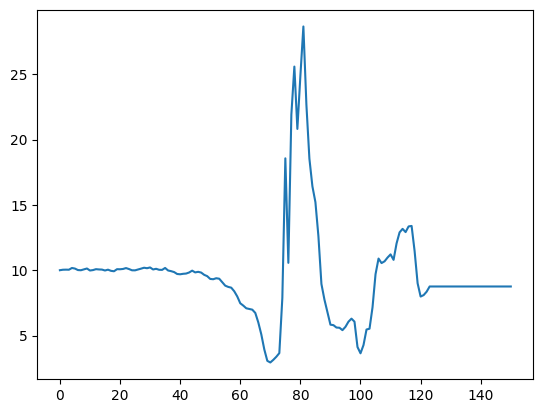

In [69]:
plt.plot(mag)

Magnitude for one type of fall and one person.

In [189]:
fall_labels[(fall_labels.fall_type == 1) & (fall_labels.subject == 1)]

,fall_type,subject,trial
0,1,1,1
1,1,1,1
2,1,1,2
3,1,1,3
4,1,1,3
5,1,1,3
6,1,1,4
7,1,1,5
8,1,1,5
9,1,1,6


In [96]:
idxs = list(fall_labels[(fall_labels.fall_type == 1) & (fall_labels.subject == 1)].index)
idxs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [97]:
fall_data.loc[idxs]

,0,1,2,3,4,5,6,7,8,9,...,443,444,445,446,447,448,449,450,451,452
0,2.632737,2.467222,2.683357,2.692872,2.643666,2.627948,2.273950,2.323166,2.482781,2.699981,...,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358
1,2.683357,2.692872,2.643666,2.627948,2.273950,2.323166,2.482781,2.699981,2.759661,2.818073,...,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358,-1.988358
2,-1.712810,-1.515869,-1.531506,-1.521956,-1.685423,-1.600920,-1.587449,-1.635887,-1.647175,-1.214270,...,-2.377933,-2.377933,-2.377933,-2.377933,-2.377933,-2.377933,-2.377933,-2.377933,-2.377933,-2.377933
3,1.023457,0.767005,0.808739,0.858855,0.811381,0.521233,0.271401,0.201594,0.477340,0.766633,...,-1.555970,-1.509740,-1.311242,-1.407577,-0.949681,-0.327394,-0.195166,-0.195166,-0.195166,-0.195166
4,0.811381,0.521233,0.271401,0.201594,0.477340,0.766633,0.719233,0.728124,0.767005,0.694136,...,-0.949681,-0.327394,-0.195166,-0.195166,-0.195166,-0.195166,-0.195166,-0.195166,-0.195166,-0.195166
5,1.949032,2.234576,2.500747,2.302773,2.126134,2.013997,2.037397,2.260986,2.338138,2.305343,...,-0.195166,-0.195166,-0.195166,-0.195166,-0.195166,-0.195166,-0.195166,-0.195166,-0.195166,-0.195166
6,2.049914,2.188029,1.893650,1.547338,1.459622,1.706985,1.642780,1.222850,0.880315,0.796884,...,-5.195630,-5.195630,-5.195630,-5.195630,-5.195630,-5.195630,-5.195630,-5.195630,-5.195630,-5.195630
7,-0.480877,-0.382604,-0.344605,-0.447871,-0.590425,-0.510869,-0.424414,1.857440,-1.639893,-1.138810,...,5.333530,5.442529,5.485041,5.555315,5.594167,5.514418,5.300783,5.284477,5.271683,5.158343
8,1.572437,1.700728,1.763333,1.763333,1.797546,1.901164,1.801653,1.875686,1.982315,2.118812,...,5.158343,5.158343,5.158343,5.158343,5.158343,5.158343,5.158343,5.158343,5.158343,5.158343
9,0.650926,0.367090,0.208253,0.151362,0.113731,0.314998,0.708726,1.107252,1.388631,1.455512,...,1.158351,1.185404,1.028378,1.149221,1.651129,1.877096,1.862942,1.932008,2.482689,1.893261


Magnitude DataFrame calculation.

In [190]:
#falls

magnitude_table_avg = []
for f in range(1, fall_labels.fall_type.max()+1):
    magnitude_table_f_avg = []
    for s in range(1, fall_labels.subject.max()+1):
        magnitude_table_f_s = []
        idxs = list(fall_labels[(fall_labels.fall_type == f) & (fall_labels.subject == s)].index)
        df = fall_data.loc[idxs]
        #print("fall:", f, "subject:",  s, "number of trials:", len(list(df.index)))
        for i in list(df.index):
            row = np.array(df.loc[i, :]).reshape((3, 151))
            magnitude = []
            for x in np.nditer(row, flags=['external_loop'], order='F'):
                magnitude.append(math.sqrt(sum(x**2)))
            magnitude_table_f_s.append(magnitude)    
        #print("magnitudes", len(magnitude_table_f_s))
        magnitude_table_f_s = pd.DataFrame(magnitude_table_f_s)     #table with magnitudes - certain fall type and subject
        #print(magnitude_table_f_s.shape) 
        magnitude_table_f_avg.append(list(magnitude_table_f_s.mean()))    #add average for the person and fall type to this certain fall avg table
    #print("this fall magnitudes:", len(magnitude_table_f_avg))
    magnitude_table_f_avg = pd.DataFrame(magnitude_table_f_avg)
    #print(magnitude_table_f_avg.shape)
    magnitude_table_avg.append(list(magnitude_table_f_avg.mean()))        #add average of averages of all people and certain fall type to the general fall avg table
    #print("general fall avg number: ", len(magnitude_table_avg))
magnitude_table_avg = pd.DataFrame(magnitude_table_avg)
#print("final fall avg number: ", magnitude_table_avg.shape )

In [191]:
names = ['FallingForw', 'FallingRight', 'FallingBack', 'HittingObstacle', 'FallingWithPS', 'FallingBackSC', 'Syncope', 'FallingLeft']
magnitude_table_avg = magnitude_table_avg.set_axis(names, axis='index')
magnitude_table_avg    #"For each activity, we displayed the average magnitude shape obtained by averaging all the subjects’ shapes."

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
FallingForw,9.619651,9.629255,9.636453,9.582164,9.613551,9.573009,9.587554,9.568383,9.588381,9.432987,...,9.836448,9.897747,9.932140,9.882385,9.829547,9.847348,9.969880,10.079380,10.142245,10.165777
FallingRight,9.618574,9.573854,9.563722,9.499041,9.421401,9.422522,9.389329,9.370872,9.454706,9.485973,...,9.824316,9.786815,9.801655,9.786448,9.757207,9.793870,9.850791,9.861987,9.894819,9.912996
FallingBack,9.563320,9.439494,9.495182,9.564022,9.563693,9.526878,9.543594,9.507645,9.538400,9.492443,...,9.734368,9.683056,9.605838,9.529483,9.525595,9.546456,9.641635,9.671982,9.685727,9.704908
HittingObstacle,9.536387,9.632854,9.587060,9.542390,9.578402,9.569017,9.513652,9.427013,9.414907,9.395569,...,9.896699,9.913849,9.784793,9.675853,9.567770,9.663341,9.873134,9.957140,10.015101,10.046192
FallingWithPS,9.473894,9.476557,9.461643,9.517277,9.546902,9.476942,9.461704,9.467991,9.443707,9.403009,...,10.010569,10.032915,9.855715,9.755799,9.728732,9.775521,9.981187,9.932128,9.912633,10.032482
FallingBackSC,9.517933,9.539819,9.448606,9.436888,9.528811,9.571091,9.629873,9.506811,9.431697,9.388766,...,9.650880,9.715863,9.776321,9.766764,9.621594,9.554378,9.494539,9.501630,9.558638,9.603515
Syncope,9.557556,9.482006,9.385937,9.536933,9.466310,9.458069,9.445664,9.399482,9.403994,9.407771,...,10.022751,9.922042,9.956846,9.980399,9.936886,9.888932,9.888631,9.833735,9.715149,9.624435
FallingLeft,9.477180,9.389042,9.409692,9.400805,9.451356,9.506021,9.469887,9.455118,9.427515,9.430374,...,9.673789,9.848081,9.923188,9.901528,9.883006,9.929840,9.838781,9.790177,9.723844,9.654614


In [192]:
#adls

magnitude_table_avg2 = []
for f in range(1, adl_labels.adl_type.max()+1):
    magnitude_table_f_avg2 = []
    for s in range(1, adl_labels.subject.max()+1):
        magnitude_table_f_s2 = []
        idxs = list(adl_labels[(adl_labels.adl_type == f) & (adl_labels.subject == s)].index)
        df = adl_data.loc[idxs]
        for i in list(df.index):
            row = np.array(df.loc[i, :]).reshape((3, 151))
            magnitude = []
            for x in np.nditer(row, flags=['external_loop'], order='F'):
                magnitude.append(math.sqrt(sum(x**2)))
            magnitude_table_f_s2.append(magnitude)    
        #print("magnitudes", len(magnitude_table_f_s))
        magnitude_table_f_s2 = pd.DataFrame(magnitude_table_f_s2)     #table with magnitudes - certain fall type and subject
        #print(magnitude_table_f_s.shape) 
        magnitude_table_f_avg2.append(list(magnitude_table_f_s2.mean()))    #add average for the person and fall type to this certain fall avg table
    #print("this fall magnitudes:", len(magnitude_table_f_avg))
    magnitude_table_f_avg2 = pd.DataFrame(magnitude_table_f_avg2)
    #print(magnitude_table_f_avg.shape)
    magnitude_table_avg2.append(list(magnitude_table_f_avg2.mean()))        #add average of averages of all people and certain fall type to the general fall avg table
    #print("general fall avg number: ", len(magnitude_table_avg))
magnitude_table_avg2 = pd.DataFrame(magnitude_table_avg2)
#print("final fall avg number: ", magnitude_table_avg.shape )

In [193]:
names2 = ['StandingUpFS', 'StandingUpFL', 'Walking', 'Running', 'GoingUpS', 'Jumping', 'GoingDownS', 'LyingDownFS', 'SittingDown']
magnitude_table_avg2 = magnitude_table_avg2.set_axis(names2, axis='index')
magnitude_table_avg2    #"For each activity, we displayed the average magnitude shape obtained by averaging all the subjects’ shapes."

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
StandingUpFS,9.309191,9.268207,9.224417,9.211604,9.170933,9.157748,9.201008,9.257918,9.293745,9.321739,...,9.586988,9.556051,9.535699,9.528234,9.544336,9.552266,9.516957,9.472863,9.461792,9.433115
StandingUpFL,9.691062,9.619562,9.553572,9.547697,9.619221,9.667346,9.590101,9.464266,9.550253,9.679120,...,9.464251,9.318519,9.348889,9.430046,9.465259,9.499833,9.577401,9.539414,9.459443,9.399172
Walking,9.619916,9.661639,9.650656,9.635237,9.634696,9.761940,9.997510,10.206926,10.245390,10.174528,...,10.100816,10.042819,10.024584,9.940619,9.757594,9.696944,9.749454,9.789232,9.800806,9.848609
Running,11.575013,11.290597,10.946372,10.717900,10.432870,10.099056,9.737696,9.469768,9.335425,9.351729,...,10.695484,10.244738,9.748724,9.410411,9.228534,9.195946,9.320262,9.505795,9.627098,9.908553
GoingUpS,9.480649,9.523979,9.554432,9.590421,9.650211,9.692408,9.790370,9.838899,9.860553,9.947920,...,10.147794,10.158687,10.001077,9.997582,9.944833,9.827597,9.665101,9.551220,9.482425,9.416010
Jumping,10.073087,10.000326,10.030705,10.267237,10.207369,10.081815,9.993421,9.728726,9.602108,9.401047,...,9.421634,9.346882,9.377492,9.333795,9.419786,9.499992,9.666119,9.678719,9.930493,10.032284
GoingDownS,9.666738,9.644816,9.564785,9.527432,9.514232,9.510020,9.504483,9.599421,9.723929,9.848885,...,10.200958,10.080211,9.910908,9.773797,9.681435,9.639642,9.557122,9.485636,9.529997,9.579056
LyingDownFS,9.559487,9.495320,9.423020,9.409876,9.418038,9.473302,9.481855,9.411966,9.337698,9.352279,...,9.786802,9.714176,9.624293,9.641240,9.697749,9.716696,9.722991,9.727537,9.728428,9.643110
SittingDown,9.889551,9.851820,9.799162,9.727918,9.668301,9.631792,9.592366,9.568573,9.536286,9.502836,...,9.246752,9.277216,9.231033,9.177689,9.194285,9.308480,9.417987,9.438227,9.363375,9.356456


Plots.

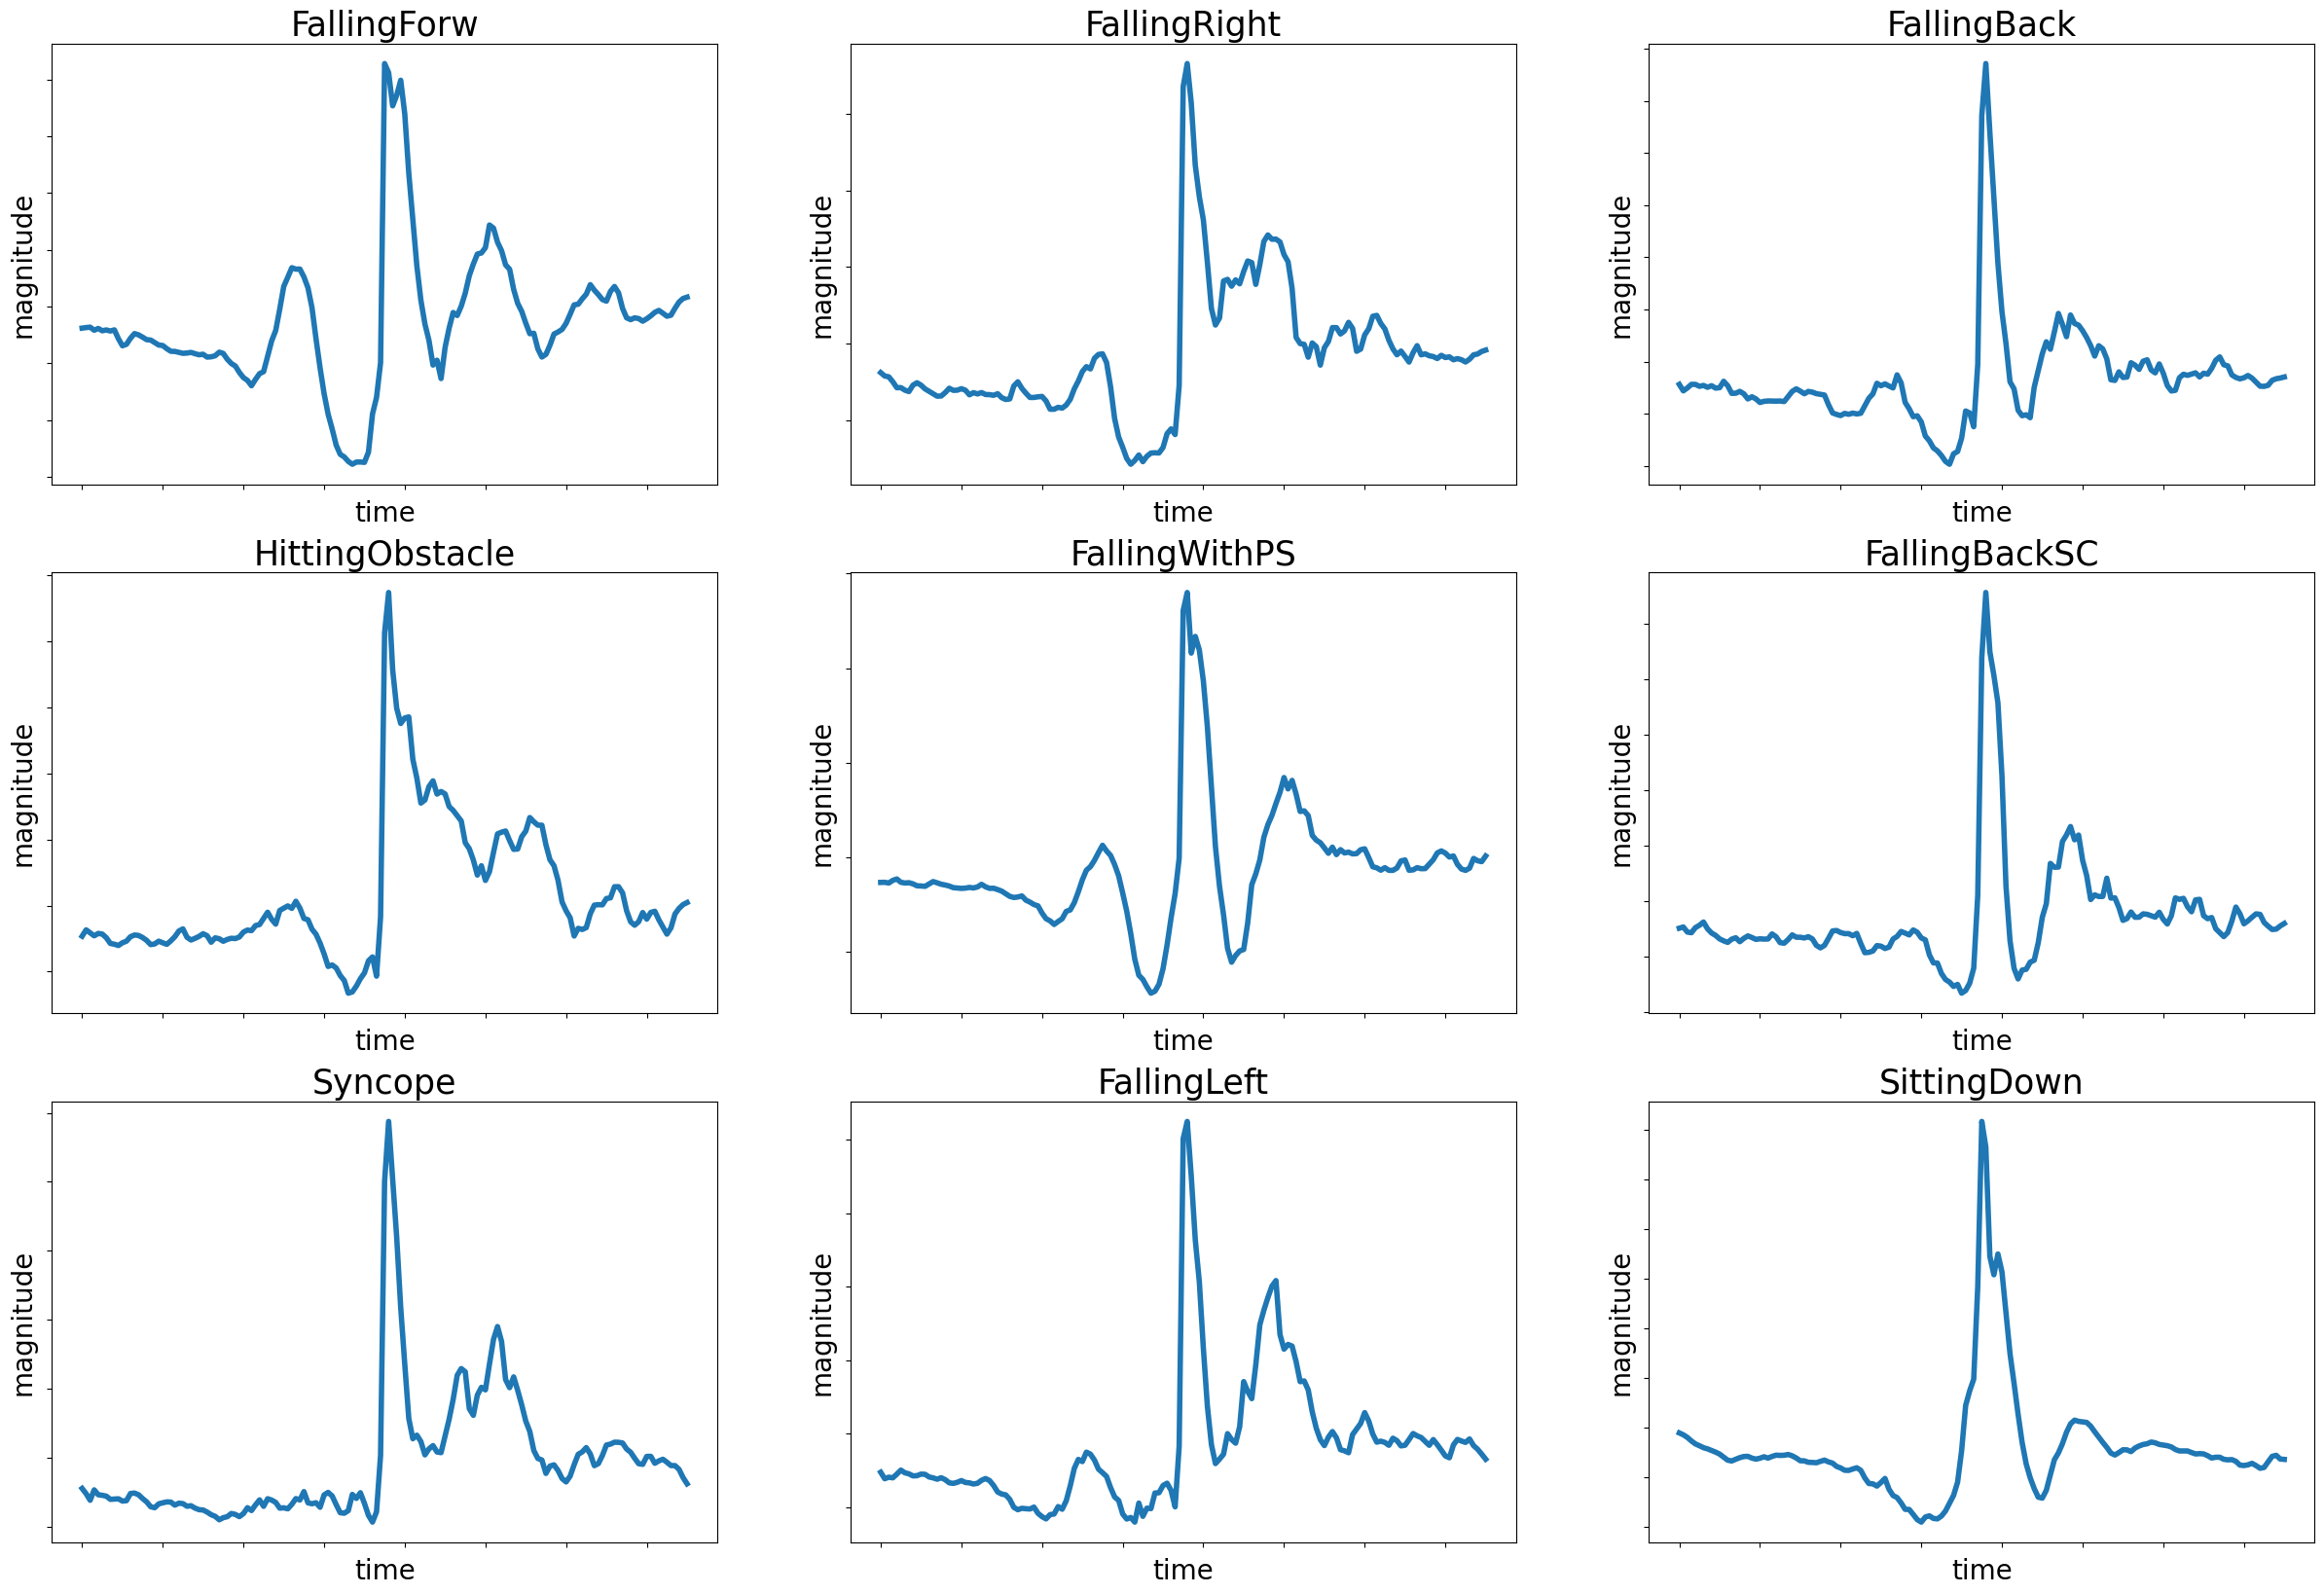

In [195]:
figure, axis = plt.subplots(3, 3, figsize = (30, 20))

for i in range(3):
    for j in range(3):
        try:
            axis[i, j].plot(magnitude_table_avg.filter(items = [names[i*3+j]],axis=0).values[0], linewidth='4')
            axis[i, j].set_title(names[i*3+j],  fontsize=25)
            axis[i, j].set_xlabel("time", fontsize=20)
            axis[i, j].set_ylabel("magnitude", fontsize=20)
            axis[i, j].axes.get_xaxis().set_ticklabels([])
            axis[i, j].axes.get_yaxis().set_ticklabels([])
        except:
            axis[i, j].plot(magnitude_table_avg2.filter(items = [names2[i*3+j]],axis=0).values[0], linewidth='4')
            axis[i, j].set_title(names2[i*3+j],  fontsize=25)
            axis[i, j].set_xlabel("time", fontsize=20)
            axis[i, j].set_ylabel("magnitude", fontsize=20)
            axis[i, j].axes.get_xaxis().set_ticklabels([])
            axis[i, j].axes.get_yaxis().set_ticklabels([])

In [196]:
figure.savefig('charts.png', format='png', dpi=300)